In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
df=pd.read_csv("tesla-stock-price.csv",index_col="date",parse_dates=True)

In [3]:
df.head()

,close,volume,open,high,low
date,,,,,
2023-07-23 11:34:00,270.49,"4,787,699",264.50,273.88,262.2400
2018-10-15 00:00:00,259.59,6189026.0000,259.06,263.28,254.5367
2018-10-12 00:00:00,258.78,7189257.0000,261.00,261.99,252.0100
2018-10-11 00:00:00,252.23,8128184.0000,257.53,262.25,249.0300
2018-10-10 00:00:00,256.88,12781560.0000,264.61,265.51,247.7700


In [4]:
df.isna().any()

close     False
volume    False
open      False
high      False
low       False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2023-07-23 11:34:00 to 2015-10-15 00:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   757 non-null    float64
 1   volume  757 non-null    object 
 2   open    757 non-null    float64
 3   high    757 non-null    float64
 4   low     757 non-null    float64
dtypes: float64(4), object(1)
memory usage: 35.5+ KB


<Axes: xlabel='date'>

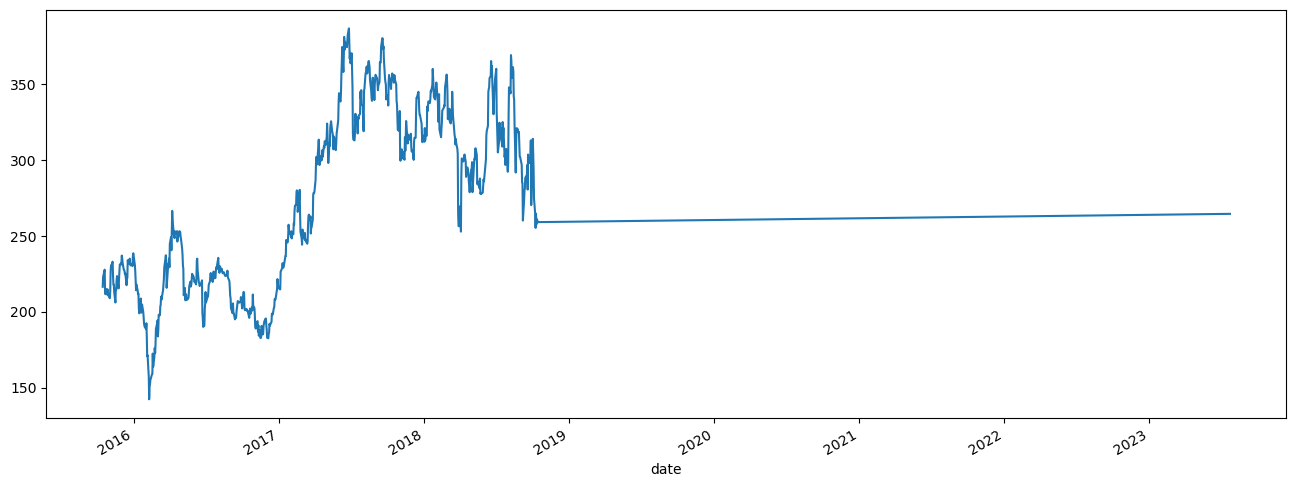

In [6]:
df['open'].plot(figsize=(16,6))

In [7]:
df["volume"]=df["volume"].str.replace(',','').astype(float)
#converting string into float

In [8]:
df.rolling(7).mean().head(20)

,close,volume,open,high,low
date,,,,,
2023-07-23 11:34:00,NaN,NaN,NaN,NaN,NaN
2018-10-15 00:00:00,NaN,NaN,NaN,NaN,NaN
2018-10-12 00:00:00,NaN,NaN,NaN,NaN,NaN
2018-10-11 00:00:00,NaN,NaN,NaN,NaN,NaN
2018-10-10 00:00:00,NaN,NaN,NaN,NaN,NaN
2018-10-09 00:00:00,NaN,NaN,NaN,NaN,NaN
2018-10-08 00:00:00,258.761429,9.212098e+06,260.924286,265.919986,252.555243
2018-10-05 00:00:00,257.541429,1.108539e+07,262.374286,266.062843,252.235243
2018-10-04 00:00:00,260.718571,1.157822e+07,267.358571,270.451414,255.540000


<Axes: xlabel='date'>

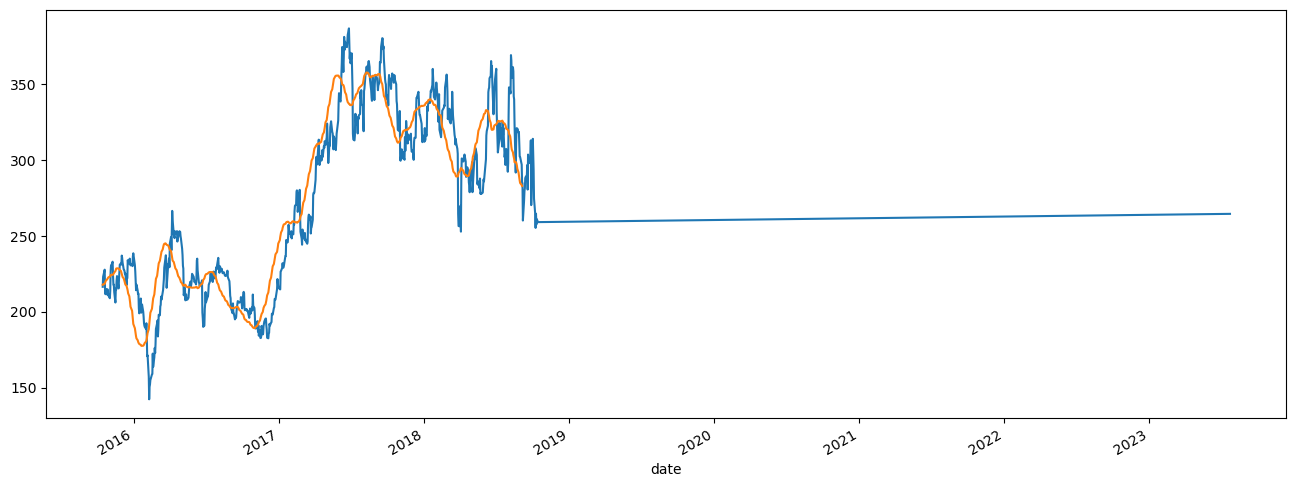

In [9]:
df['open'].plot(figsize=(16,6))#previous graph
df.rolling(window=30).mean()['close'].plot()#it gives moving average of past 30 days

<Axes: xlabel='date'>

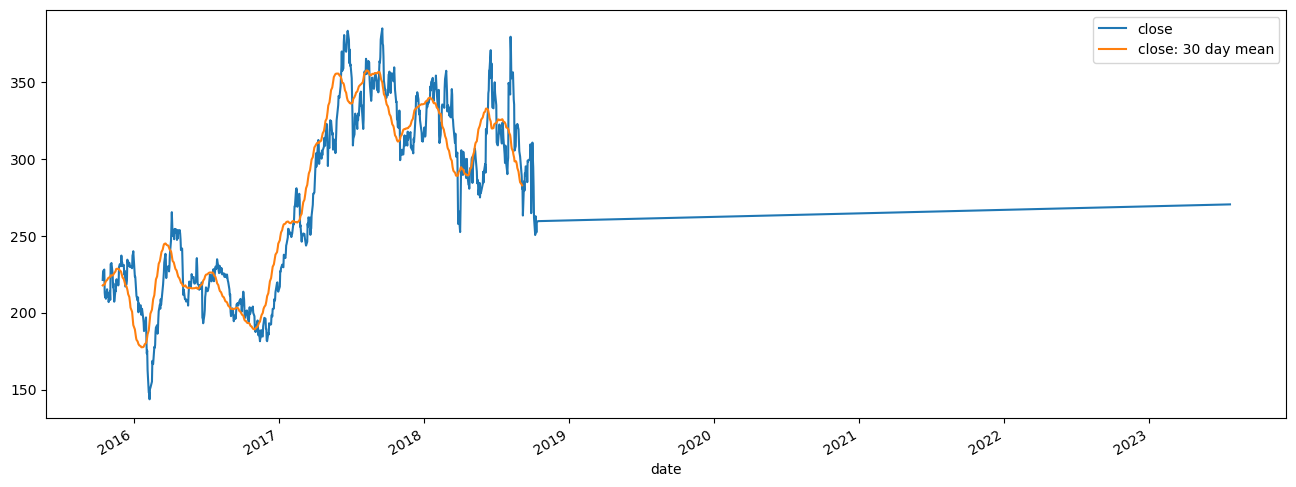

In [10]:
df['close: 30 day mean']=df['close'].rolling(window=30).mean()
df[['close','close: 30 day mean']].plot(figsize=(16,6))

<Axes: xlabel='date'>

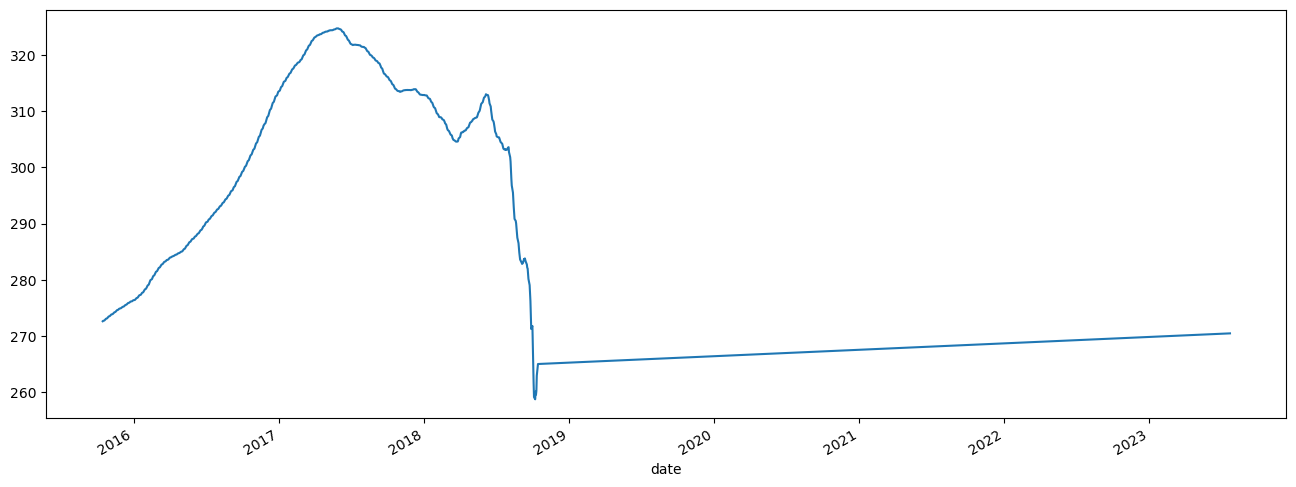

In [11]:
df['close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [12]:
training_set=df['open']
training_set=pd.DataFrame(training_set)

# Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [14]:
x_train=[]
y_train=[]
for i in range(60,757):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))

# Building RNN

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
regressor=Sequential()

In [17]:
#LSTM first layer
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#LSTM second layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#LSTM third layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#LSTM fourth layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
#output layer
regressor.add(Dense(units=1))

In [18]:
#compiling the rnn
regressor.compile(optimizer='adam',loss='mean_squared_error')
#fitting rnn to training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
22/22 [==============================] - 14s 127ms/step - loss: 0.0651
Epoch 2/100
22/22 [==============================] - 3s 123ms/step - loss: 0.0180
Epoch 3/100
22/22 [==============================] - 2s 112ms/step - loss: 0.0122
Epoch 4/100
22/22 [==============================] - 3s 126ms/step - loss: 0.0122
Epoch 5/100
22/22 [==============================] - 3s 127ms/step - loss: 0.0110
Epoch 6/100
22/22 [==============================] - 3s 126ms/step - loss: 0.0114
Epoch 7/100
22/22 [==============================] - 3s 126ms/step - loss: 0.0109
Epoch 8/100
22/22 [==============================] - 3s 122ms/step - loss: 0.0113
Epoch 9/100
22/22 [==============================] - 2s 113ms/step - loss: 0.0107
Epoch 10/100
22/22 [==============================] - 3s 125ms/step - loss: 0.0093
Epoch 11/100
22/22 [==============================] - 3s 127ms/step - loss: 0.0096
Epoch 12/100
22/22 [==============================] - 3s 125ms/step - loss: 0.0094
Epoch 13/100

# Importing dataset of 2023

In [19]:
df_test=pd.read_csv("Stock Prices_new.csv",index_col="Date",parse_dates=True)


C:\Users\91991\AppData\Local\Temp\ipykernel_18068\20095884.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_test=pd.read_csv("Stock Prices_new.csv",index_col="Date",parse_dates=True)


In [20]:
df_test=df_test.drop(["ticker"],axis=1)

In [21]:
real_stock_price=df_test.iloc[:, 1:2].values

In [22]:
df_test.head()

,open,high,low,close,volume
Date,,,,,
2023-10-01,14.56,15.20,14.5600,15.19,31109866
2023-02-13,16.25,16.60,16.2100,16.51,15649916
2023-12-01,16.03,16.90,15.8750,16.83,96441833
2023-01-13,16.22,17.07,16.0101,17.02,50828019
2023-01-17,16.90,17.12,16.7400,17.08,32875679


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700 entries, 2023-10-01 to 2023-10-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    700 non-null    float64
 1   high    700 non-null    float64
 2   low     700 non-null    float64
 3   close   700 non-null    float64
 4   volume  700 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 32.8 KB


In [24]:
test_set=df_test['open']
test_set=pd.DataFrame(test_set)

In [25]:
#getting predicted stock price of 2023
df_total=pd.concat((df['open'], df_test['open']),axis=0)
inputs=df_total[len(df_total) - len(df_test) -60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_stock_price=regressor.predict(x_test)
pred_stock_price=sc.inverse_transform(pred_stock_price)

C:\Users\91991\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 2s 2s/step


In [26]:
pred_stock_price=pd.DataFrame(pred_stock_price)
pred_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


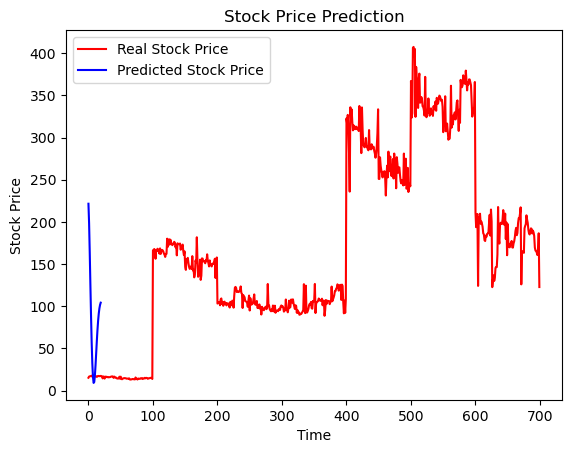

In [27]:
#visualising results
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(pred_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()